# Задание 7

Решить систему уравнений хищник-жертва
$$\left\{\begin{matrix}
\dot{x} = ax - bxy\\ 
\dot{y} = cxy - dy
\end{matrix}\right.$$
методом Рунге-Кутты второго порядка точности при a = 10, b = 2, c = 2, d = 10.
Нарисовать фазовую траекторию.

## Модель Лотки-Вольтерры

Система Лотки-Вольтерры является первоначальной и простейшей системой (усложненные системы будут рассмотрены ниже) для описания модели «хищник-жертва», то есть популяции хищников и популяции жертв, взаимодействующих в какой-то среде: жертвы едят растительность, хищники — жертв:

![title](predator_prey_main.png)

где
* x — численность жертв (травоядных);
* y — численность хищников;
* α — вероятность того, что травоядные размножатся;
* β — вероятность того, что травоядное будет съедено хищником;
* γ — вероятность того, что хищник умрет от голода;
* δ — вероятность того, что хищнику хватит еды на дальнейшее размножение.

Из системы сразу следует, что если жертв нет (x = 0), то хищники будут вымирать экспоненциально с неким начальным коэффициентом (γ согласно уравнению).

![title](predator_prey_1.png)

Схожую ситуацию получаем при полном отсутствии хищников (y = 0):

![title](predator_prey_2.png)

Рост жертв получается экспоненциальным с некой заранее заданной константой (α). Стоит отметить, что в данной модели принимаются несколько допущений:

* Количество пищи для травоядных не ограничено;
* Ни жертвы, ни хищники не эмигрируют из среды;
* Никакие другие животные не мигрируют в среду;
* Данная модель не учитывает вымирание животных по причине старения и прочих внешних воздействий.

Подробнее: https://nplus1.ru/material/2019/12/04/lotka-volterra-model

In [1]:
import matplotlib.pyplot as plt

In [2]:
a = 10
b = 2
c = 2
d = 10

In [3]:
def f1(x, y):
    return a*x - b*x*y

def f2(x, y):
    return c*x*y - d*y

## Метод Рунге-Кутты 2-го порядка

$$t_{i+1} = t_{i} + h$$

$$x_{i+1} = x_{i} + h[(1-\alpha )f_1(x_{i}, y_{i}) + \alpha f_1(x_{i} + \frac{h}{2\alpha}f_1(x_{i}, y_{i}), y_{i} + \frac{h}{2\alpha} f_2(x_{i}, y_{i})))]$$

$$y_{i+1} = y_{i} + h[(1-\alpha )f_2(x_{i}, y_{i}) + \alpha f_2(x_{i} + \frac{h}{2\alpha}f_1(x_{i}, y_{i}), y_{i} + \frac{h}{2\alpha} f_2(x_{i}, y_{i})))]$$

In [4]:
def RungeKutta_2nd(alpha, left, right, N, x_0, y_0):
    left = min(left, right)
    right = max(left, right)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (right - left) / N
    x = []
    y = []
    t = []
    x.append(x_0)
    y.append(y_0)
    t.append(left)
    for i in range(0, N):
        y.append(y[i] + h*((1 - alpha)*f2(x[i], y[i]) + alpha*f2(x[i] + h/(2*alpha)*f1(x[i], y[i]), y[i] + h/(2*alpha)*f2(x[i], y[i]))))
        x.append(x[i] + h*((1 - alpha)*f1(x[i], y[i]) + alpha*f1(x[i] + h/(2*alpha)*f1(x[i], y[i]), y[i] + h/(2*alpha)*f2(x[i], y[i]))))
        t.append(t[i] + h)
    return t, x, y

In [12]:
t_left = 0
t_right = 5
predator = 5
pray = 5
alpha = 0.75
N = 10000

In [13]:
t, x, y = RungeKutta_2nd(alpha, t_left, t_right, N, pray, predator)

Text(0, 0.5, 'Численность Хищников')

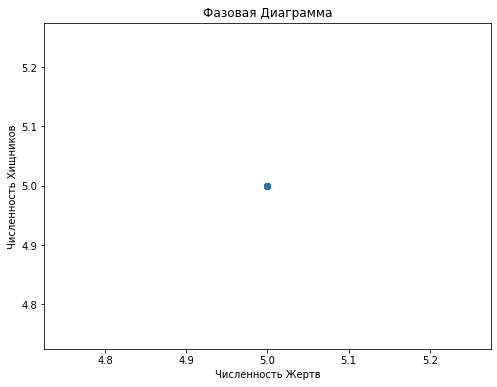

In [14]:
plt.figure(figsize=(8, 6))
#plt.plot(x,y)
plt.plot(x,y, 'o')
plt.title('Фазовая Диаграмма')
plt.xlabel('Численность Жертв')
plt.ylabel('Численность Хищников')

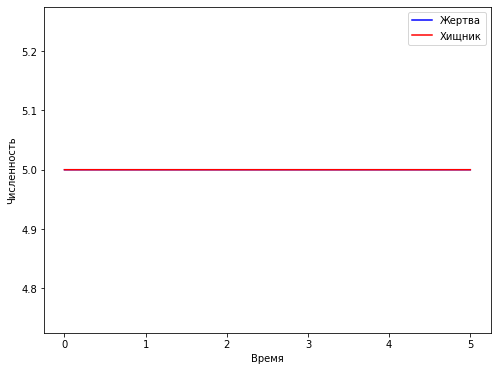

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(t, x, label='Жертва', color='blue')
plt.plot(t, y, label='Хищник', color='red')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.legend()

## Поиск стационарной позиции системы для x>0, y>0

$$a \bar{x} - b \bar{x}\bar{y} = 0$$

$$-d  \bar{y} + c \bar{x}\bar{y} = 0$$

## $$=>\; \;\bar{x} =\frac{d}{c}\; \; \bar{y} = \frac{a}{b}$$

In [9]:
xs = d/c
ys = a/b
print('x стац. =',xs, 'y стац. =',ys)

x стац. = 5.0 y стац. = 5.0


## Фазовая диаграмма

$$\frac{dx}{dt} = (a - by)x$$

$$\frac{dy}{dt} = (-d + cx)y$$

$$=>\;\;\frac{dy}{dx} = \frac{(-d + cx)y}{(a - by)x}$$

**Уравнение фазовой диаграммы:**

## $$=>\;\;aln(y)-by+dln(x)-cx = C$$


/home/nikita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/nikita/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


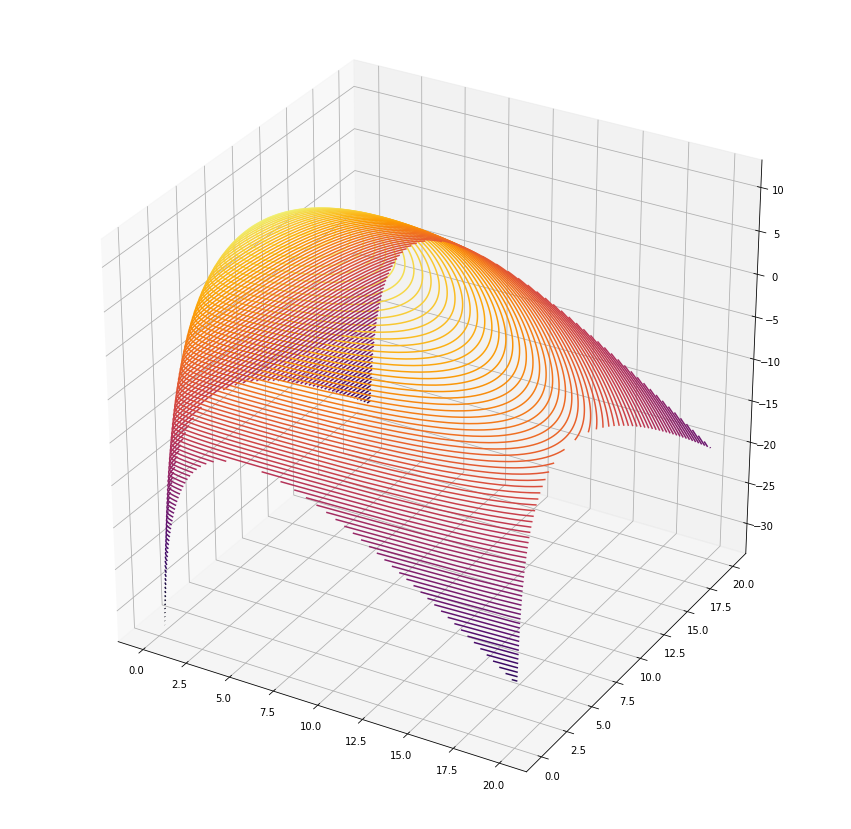

In [10]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return a*np.log(y)-b*y + d*np.log(x)-c*x

x3d = np.linspace(0, 20, 100)
y3d = np.linspace(0, 20, 100)

X, Y = np.meshgrid(x3d, y3d)
Z = f(X, Y)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='inferno')
#ax.contour3D(X, Y, Z, 50, cmap='binary')

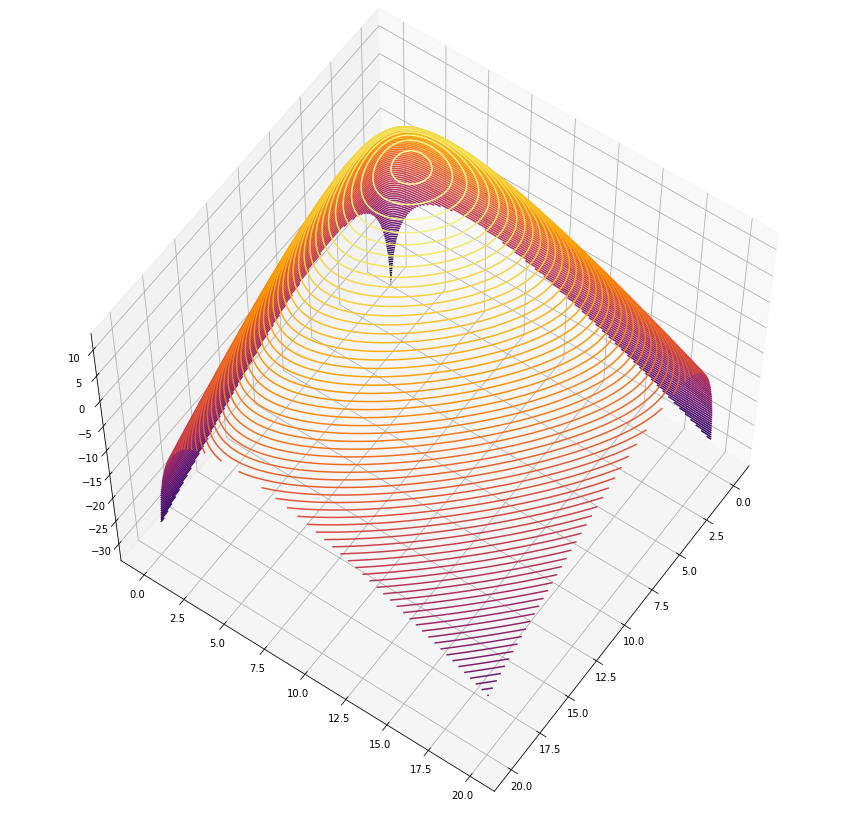

In [11]:
ax.view_init(60, 35)
fig